In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

In [161]:
read = pd.read_csv('read-list.csv')
tbr = pd.read_csv('tbr-list.csv')

In [162]:
read.head()
# tbr.head()

,title,author,yearPublished,pageCount,genre,themes,moods,pace,grRating,myRating
0,Pew,Catherine Lacey,2020,211,literary fiction,"gender, race, categorization, empathy, conform...","challenging, mysterious, reflective",slow,3.7,4.50
1,Conversations with Friends,Salley Rooney,2017,305,"literary fiction, contemporary, romance","friendship, love, romance, infidelity","emotional, reflective",medium,3.8,4.25
2,War and Peace,Leo Tolstoy,1986,1273,"literary fiction, classics, historical","war, peace, family, relationships, love, class...","challenging, emotional, reflective",slow,4.1,5.00
3,This Is How You Lose the Time War,"Max Gladstone, Amal El-Mohtar",2019,208,"fiction, romance, science fiction","lgbtq, love, friendship, desire, belonging, war","adventurous, challenging, emotional",medium,5.0,5.00
4,The New Me,Halle Butler,2019,208,"literary fiction, contemporary","mental illness, loneliness",reflective,medium,3.4,3.50


<AxesSubplot:>

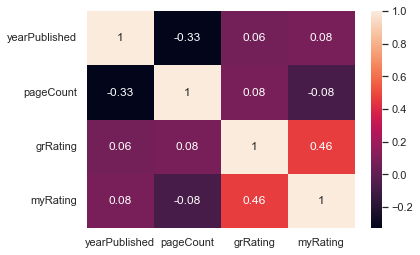

In [163]:
#confusion matrix for the books ive read list
correlation_matrix = read.corr().round(2)
sns.set(rc={'figure.figsize': (6, 4)})
sns.heatmap(data=correlation_matrix, annot=True)

In [164]:
#confusion matrix for tbr list
# correlation_matrix = tbr.corr().round(2)
# sns.set(rc={'figure.figsize': (11.7, 8.27)})
# sns.heatmap(data=correlation_matrix, annot=True)

Text(0, 0.5, 'Frequency')

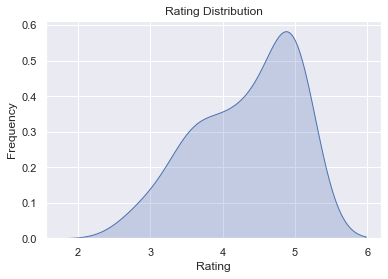

In [165]:
#my ratings distribution
sns.kdeplot(read['myRating'], shade = True)
sns.set(rc={'figure.figsize': (6, 4)})
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

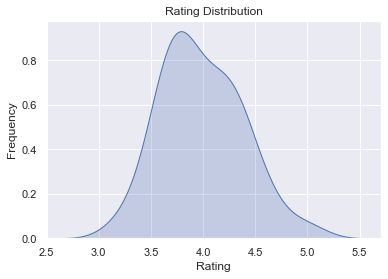

In [166]:
#goodreads rating distribution
sns.kdeplot(read['grRating'], shade = True)
sns.set(rc={'figure.figsize': (6, 4)})
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')

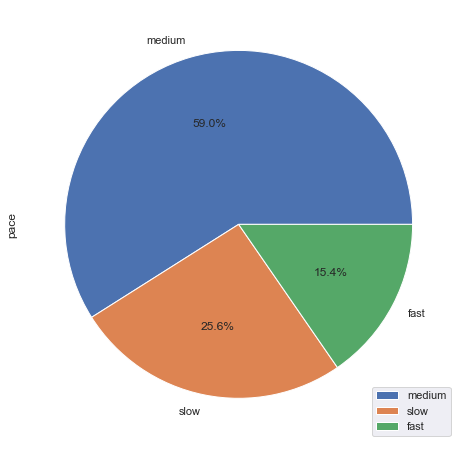

In [167]:
#top 5 themes
read['pace'].value_counts().head(5).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

In [168]:
#top 5 genres
# read['genre'].value_counts().head(5).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

In [240]:
themes = read.themes
themeList = themes.str.split()

i = 0
while i <39:
    themeList[1].extend(themeList[i])
    i += 1
print(themeList[1])

['friendship,', 'love,', 'romance,', 'infidelity', 'gender,', 'race,', 'categorization,', 'empathy,', 'conformity,', 'community', 'friendship,', 'love,', 'romance,', 'infidelity', 'gender,', 'race,', 'categorization,', 'empathy,', 'conformity,', 'community', 'war,', 'peace,', 'family,', 'relationships,', 'love,', 'class,', 'marriage', 'lgbtq,', 'love,', 'friendship,', 'desire,', 'belonging,', 'war', 'mental', 'illness,', 'loneliness', 'love,', 'family,', 'relationships,', 'grief,', 'loss,', 'gender,', 'forgivenessq', 'lgbtq,', 'love,', 'friendship,', 'motherhood,', 'gender', 'power,', 'vulnerability,', 'abuse,', 'colonialism', 'materialism,', 'consumption,', 'identity,', 'isolation,', 'violence,', 'mental', 'illness,', 'crime', 'grief,', 'family,', 'relationships', 'family,', 'morality,', 'crime,', 'sacrifice', 'sanity,', 'desire,', 'fear,', 'freedom,', 'gender,', 'borders', 'colonialism,', 'family,', 'nature,', 'tradition,', 'power,', 'politics,', 'fear', 'lgbtq,', 'feminism,', 'abuse

In [244]:
genres = read.genre
genreList = genres.str.split()

i = 0
while i <39:
    genreList[1].extend(genreList[i])
    i += 1
# print(genreList[1])
print(genres)

#create a sep variable 'genre_words' -- instead of genreList[1] use genre_words

0                                      literary fiction
1               literary fiction, contemporary, romance
2                literary fiction, classics, historical
3                     fiction, romance, science fiction
4                        literary fiction, contemporary
5                          literary fiction, historical
6                        literary fiction, contemporary
7                          fiction, fantasy, historical
8                             fiction, horror, thriller
9                                               fiction
10                       fiction, contemporary, mystery
11                                      fiction, horror
12                   fiction, classics, science fiction
13                                   nonfiction, memoir
14                            fiction, horror, thriller
15               literary fiction, contemporary, horror
16                         literary fiction, historical
17                                fiction, conte

['literary',
 'fiction,',
 'contemporary,',
 'romance',
 'literary',
 'fiction',
 'literary',
 'fiction,',
 'contemporary,',
 'romance',
 'literary',
 'fiction',
 'literary',
 'fiction,',
 'classics,',
 'historical',
 'fiction,',
 'romance,',
 'science',
 'fiction',
 'literary',
 'fiction,',
 'contemporary',
 'literary',
 'fiction,',
 'historical',
 'literary',
 'fiction,',
 'contemporary',
 'fiction,',
 'fantasy,',
 'historical',
 'fiction,',
 'horror,',
 'thriller',
 'fiction',
 'fiction,',
 'contemporary,',
 'mystery',
 'fiction,',
 'horror',
 'fiction,',
 'classics,',
 'science',
 'fiction',
 'nonfiction,',
 'memoir',
 'fiction,',
 'horror,',
 'thriller',
 'literary',
 'fiction,',
 'contemporary,',
 'horror',
 'literary',
 'fiction,',
 'historical',
 'fiction,',
 'contemporary',
 'fiction,',
 'poetry',
 'fiction,',
 'fantasy,',
 'horror',
 'fiction,',
 'contemporary,',
 'short',
 'stories',
 'literary',
 'fiction,',
 'contemporary,',
 'horror,',
 'short',
 'stories',
 'fiction,',
 

In [171]:
moods = read.moods
moodList = moods.str.split()

i = 0
while i <39:
    moodList[1].extend(moodList[i])
    i += 1
# print(moodList[1])

In [172]:
# from collections import Counter
# words = Counter(themeList.str.split())
# print(words)

# themes = str(read.themes)

# count = {}
# for w in themes.split():
#     if w in count:
#         count[w] += 1
#     else:
#         count[w] = 1
# for word, times in count.items():
#     print("%s was found %d times" % (word, times))
    
    
# print(count)
# count.value_counts().head(5).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

#goodreads rating distribution
# sns.kdeplot(count, shade = True)
# plt.title('Rating Distribution')
# plt.xlabel('Rating')
# plt.ylabel('Frequency')

abuse :  12
family :  9
relationships :  9
gender :  7
love :  7
lgbtq :  7
grief :  7
friendship :  6


<AxesSubplot:xlabel='Word'>

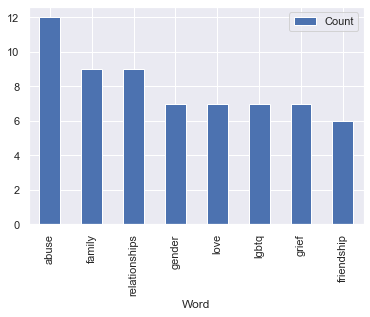

In [173]:
#themes are likely going to be one of the biggest indicators of whether or not I'm going to
#like a book, so here, since all the books have multiple themes, I'm splitting all the themes up and
#putting them in a single list. From here, I'll count count how many times each theme appears, 
#and display a chart to figure out which themes I tend to read the most!

import collections
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

read = pd.read_csv('read-list.csv')

themes = str(read.themes)

count = {}

for w in themes.split():
    w = w.replace(',','')
    if w in count:
        count[w] += 1
    else:
        count[w] = 1

# Print most common word
word_counter = collections.Counter(count)
for theme, count in word_counter.most_common(8):
    print(theme, ": ", count)

# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(8)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

fiction :  40
literary :  15
contemporary :  14
horror :  8
historical :  5
nonfiction :  5
science :  4
thriller :  4


<AxesSubplot:xlabel='Word'>

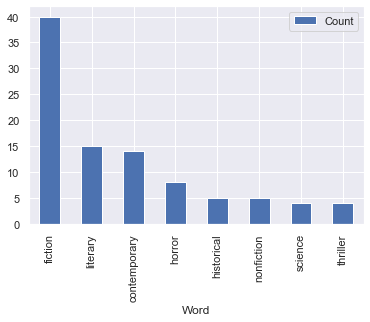

In [174]:
#one issue with the genres is that it's not differentiating between 'fiction' and 'literary fiction', so
#theres a lot more in the 'fiction' category than there should be

genres = str(read.genre)

count = {}

for w in genres.split():
    w = w.replace(',','')
    if w in count:
        count[w] += 1
    else:
        count[w] = 1

# Print most common word
word_counter = collections.Counter(count)
for genre, count in word_counter.most_common(8):
    print(genre, ": ", count)

# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(8)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

reflective :  22
dark :  19
emotional :  11
challenging :  10
mysterious :  10
tense :  7
sad :  3
funny :  3


<AxesSubplot:xlabel='Word'>

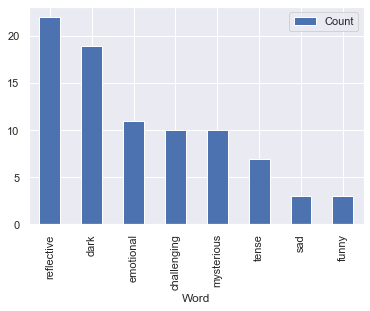

In [175]:
moods = str(read.moods)

count = {}

for w in moods.split():
    w = w.replace(',','')
    if w in count:
        count[w] += 1
    else:
        count[w] = 1

# Print most common word
word_counter = collections.Counter(count)
for mood, count in word_counter.most_common(8):
    print(mood, ": ", count)

# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(8)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

Text(0.5, 1.0, 'Goodreads Ratings')

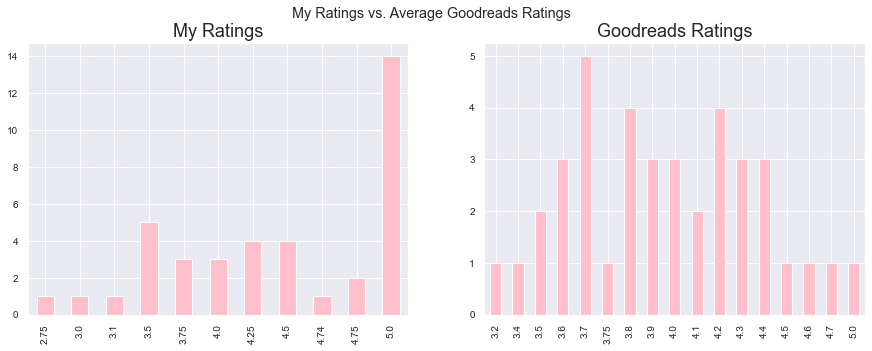

In [176]:
#distribution of my ratings vs. average goodreads ratings of books ive read

import matplotlib.colors as colors
sns.set()
sns.color_palette("flare", as_cmap=True)


fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('My Ratings vs. Average Goodreads Ratings ')

read['myRating'].value_counts().sort_index().plot.bar(
    ax=axes[0], fontsize = 10, color = 'pink'

)
axes[0].set_title("My Ratings", fontsize=18)


read['grRating'].value_counts().sort_index().head(50).plot.bar(
    ax=axes[1], fontsize = 10, color='pink'

)

axes[1].set_title("Goodreads Ratings", fontsize=18)

In [177]:
#my highest and lowest rated books vs goodreads highest and lowest rated books

# import matplotlib.colors as colors
# sns.set()
# sns.color_palette("flare", as_cmap=True)


# # myLowestRated = read.nsmallest(10, ['myRating']).set_index('title')['myRating']
# # sns.barplot(myLowestRated, myLowestRated.index)



# fig, axes = plt.subplots(2, 2, figsize=(15, 5))
# fig.suptitle('My Ratings vs. Average Goodreads Ratings ')


# #plot 1
# myLowestRated = read.nsmallest(10, ['myRating']).set_index('title')['myRating']
# sns.barplot(myLowestRated, myLowestRated.index)(
#     ax=axes[0], fontsize = 10, color='pink'

# )
# axes[0].set_title("My Ratings", fontsize=18)


# # #plot 2
# grLowestRated = read.nsmallest(10, ['grRating']).set_index('title')['grRating']
# sns.barplot(grLowestRated, grLowestRated.index)(
#     ax=axes[1], fontsize = 10, color='pink'

# )
# axes[1].set_title("My Ratings", fontsize=18)


# # #plot 3
# myHighestRated = read.nlargest(10, ['myRating']).set_index('title')['myRating']
# sns.barplot(myHighestRated, myHighestRated.index)(
#     ax=axes[2], fontsize = 10, color='pink'

# )
# axes[2].set_title("My Ratings", fontsize=18)


# # #plot 4
# grHighestRated = read.nlargest(10, ['grRating']).set_index('title')['grRating']
# sns.barplot(grHighestRated, grHighestRated.index)(
#     ax=axes[3], fontsize = 10, color='pink'

# )
# axes[3].set_title("My Ratings", fontsize=18)

/Users/paigelewis/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='myRating', ylabel='title'>

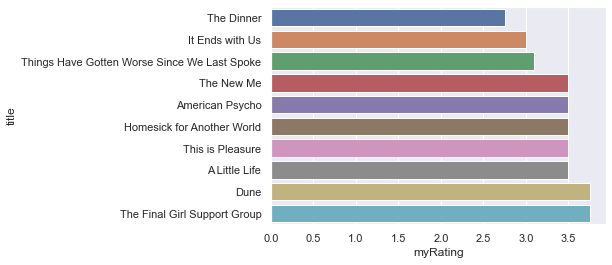

In [178]:
#books I've rated the lowest
myLowestRated = read.nsmallest(10, ['myRating']).set_index('title')['myRating']
sns.barplot(myLowestRated, myLowestRated.index)

/Users/paigelewis/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='grRating', ylabel='title'>

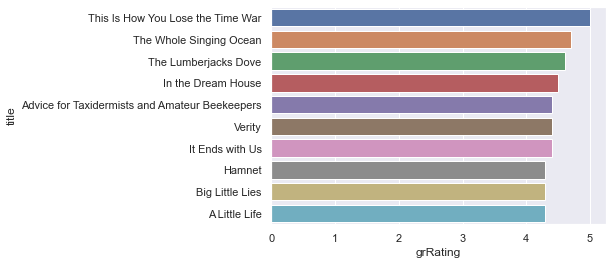

In [179]:
#books goodreads users rated the highest
grHighestRated = read.nlargest(10, ['grRating']).set_index('title')['grRating']
sns.barplot(grHighestRated, grHighestRated.index)

/Users/paigelewis/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='grRating', ylabel='title'>

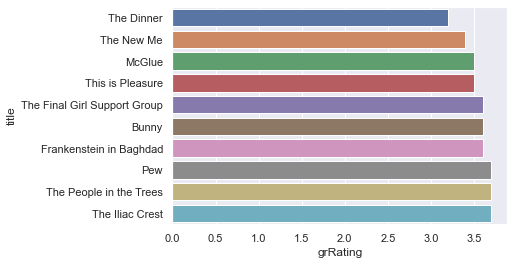

In [180]:
#books goodreads users rated the lowest
grLowestRated = read.nsmallest(10, ['grRating']).set_index('title')['grRating']
sns.barplot(grLowestRated, grLowestRated.index)


This looks slightly more normally distributed, but I also have a very small sample size



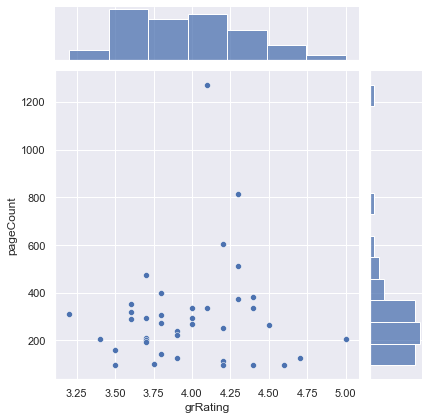

In [181]:
#visualizing a bivariate distribution between goodreads ratings and number of pages
sns.jointplot(x = 'grRating', y = 'pageCount', data = read)
print('')
print('This looks slightly more normally distributed, but I also have a very small sample size')
print('')


This shows me that I tend to disagree with the average goodreads rating for a book



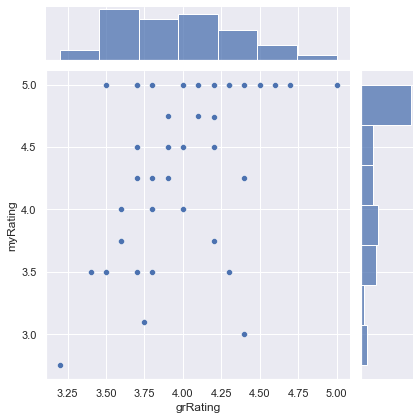

In [182]:
#visualizing a bivariate distribution between goodreads ratings and my ratings
sns.jointplot(x = 'grRating', y = 'myRating', data = read)
print('')
print('This shows me that I tend to disagree with the average goodreads rating for a book')
print('')

In [183]:
#feature engineering
# le = preprocessing.LabelEncoder()

# read['title'] = le.fit_transform(read.title)
# read['author'] = le.fit_transform(read.author)
# theme = le.fit_transform(['theme'])
# genre = le.fit_transform(['genre'])
# mood = le.fit_transform(['mood'])
# read['pace'] = le.fit_transform(read.pace)
# myRating = le.fit_transform(read.myRating)

In [184]:
# x = read.drop(['myRating'], axis = 1)
# y = read['myRating']

In [185]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 10)

In [186]:
# lr = LinearRegression()
# lr.fit(x_train, y_train)

/Users/paigelewis/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


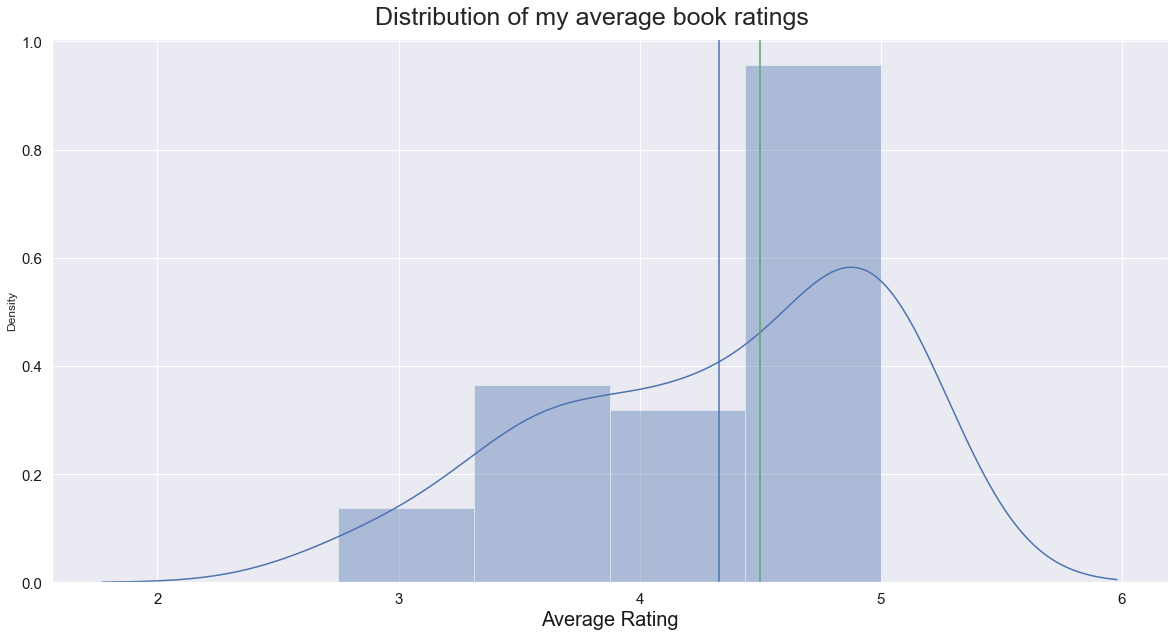

Unadjusted mean: 4.33
Unadjusted median: 4.5
Unadjusted variance: 0.46


In [187]:
plt.figure(figsize=(20,10))
sns.distplot(read['myRating'])
plt.axvline(read['myRating'].mean(), color='b')
plt.axvline(read['myRating'].median(), color='g')

plt.figtext(.5,.9,'Distribution of my average book ratings', 
            fontsize=25, ha='center')
plt.xticks(fontsize=15, color='k')
plt.yticks(fontsize=15, color='k')
plt.xlabel('Average Rating', fontsize=20, color='k')
plt.show()

print('Unadjusted mean:', round(read['myRating'].mean(), 2))
print('Unadjusted median:', round(read['myRating'].median(), 2))
print('Unadjusted variance:', round(read['myRating'].var(), 2))

/Users/paigelewis/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


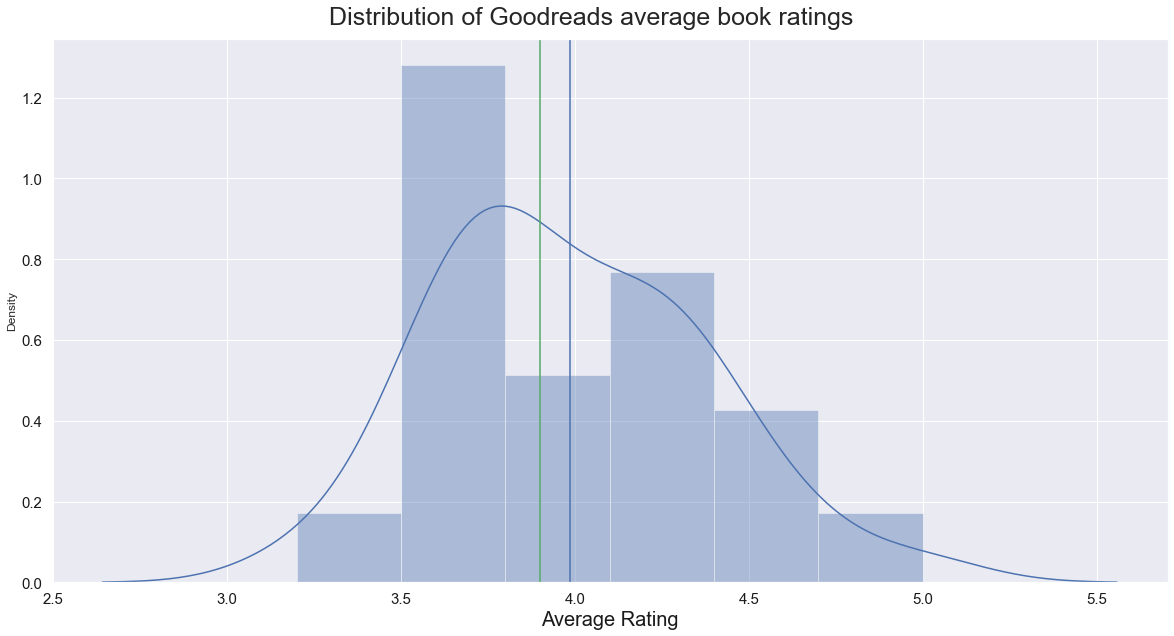

Unadjusted mean: 3.99
Unadjusted median: 3.9
Unadjusted variance: 0.15


In [188]:
plt.figure(figsize=(20,10))
sns.distplot(read['grRating'])
plt.axvline(read['grRating'].mean(), color='b')
plt.axvline(read['grRating'].median(), color='g')

plt.figtext(.5,.9,'Distribution of Goodreads average book ratings', 
            fontsize=25, ha='center')
plt.xticks(fontsize=15, color='k')
plt.yticks(fontsize=15, color='k')
plt.xlabel('Average Rating', fontsize=20, color='k')
plt.show()

print('Unadjusted mean:', round(read['grRating'].mean(), 2))
print('Unadjusted median:', round(read['grRating'].median(), 2))
print('Unadjusted variance:', round(read['grRating'].var(), 2))

In [189]:
#droping the ratings columns for training
# x = read.drop(['myRating'], axis=1)
# y = read['myRating']

In [190]:
#split data into train and test sets
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 45)

# #split data into train and validation sets
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.22, random_state = 45)

# #checking dimensions
# print(x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape)


In [191]:
# from sklearn.linear_model import LogisticRegressionCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import make_pipeline

# lr = make_pipeline(
#     # OrdinalEncoder(), 
#     # SimpleImputer(), 
#     # StandardScaler(), 
#     LogisticRegressionCV(cv=20, n_jobs=-1, scoring='roc_auc', max_iter=1000)
# )

# lr.fit(x_train, y_train)
# lr_roc_auc = round(lr.score(x_val, y_val), 4)

# lr_pred = lr.predict(x_val)
# lr_accuracy = round(accuracy_score(y_val, lr_pred), 4)

### Trying a New Approach

In [192]:
# themes = themeList[1]
# genres = genreList[1]
# moods = moodList[1]
# print(themes)

In [193]:
# import nltk
# from nltk.tokenize import word_tokenize
# nltk.download('stopwords')

# themes_freq = nltk.FreqDist(themes)
# sorted(themes_freq,key=frequency_dist.__getitem__, reverse=True)[0:50]

In [194]:
# genres_freq = nltk.FreqDist(genres)
# sorted(genres_freq,key=frequency_dist.__getitem__, reverse=True)[0:26]

In [195]:
# moods_freq = nltk.FreqDist(moods)
# sorted(moods_freq,key=frequency_dist.__getitem__, reverse=True)[0:13]

In [196]:
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# themes_wordcloud = WordCloud().generate_from_frequencies(themes_freq)

# plt.imshow(themes_wordcloud)
# plt.axis('off')
# plt.show()

In [197]:
# genres_wordcloud = WordCloud().generate_from_frequencies(genres_freq)

# plt.imshow(genres_wordcloud)
# plt.axis('off')
# plt.show()

In [198]:
# moods_wordcloud = WordCloud().generate_from_frequencies(moods_freq)

# plt.imshow(moods_wordcloud)
# plt.axis('off')
# plt.show()

In [199]:
#droping the ratings columns for training
# x = read.drop(['myRating'], axis=1)
# y = read['myRating']

In [200]:
# #split data into train and test sets
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 45)

# #split data into train and validation sets
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.22, random_state = 45)

# #checking dimensions
# print(x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape)


In [201]:
# from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = TfidfVectorizer()
# train_vectors = vectorizer.fit_transform(x_train)
# test_vectors = vectorizer.transform(x_test)
# print(train_vectors.shape, test_vectors.shape)

In [202]:
# #sentiment analyzer
# from sklearn.naive_bayes import MultinomialNB

# clf = MultinomialNB().fit(train_vectors, y_train)

In [203]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# import re
# import category_encoders as ce
# import scipy.stats as st
# from sklearn.model_selection import train_test_split
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegressionCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import make_pipeline
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import plot_roc_curve
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import accuracy_score
# from xgboost import XGBClassifier
# from sklearn.metrics import plot_confusion_matrix
# import eli5
# from eli5.sklearn import PermutationImportance

# #permutation importance
# transformers = make_pipeline(
#     ce.OrdinalEncoder(), 
#     SimpleImputer()
# )

# x_train_transformed = transformers.fit_transform(x_train)
# x_val_transformed = transformers.transform(x_val)

# #pull out model because that's what eli5 expects
# model = XGBClassifier(n_estimators=1000, random_state=50, n_jobs=-1)
# model.fit(x_train_transformed, y_train)
          
# permuter = PermutationImportance(
#     model,
#     scoring = 'roc_auc',
#     n_iter = 5,          #run each permutation 5 times, then take the average
#     random_state = 50)

# permuter.fit(x_val_transformed, y_val)

# feature_names = x_val.columns.tolist()
# eli5.show_weights(permuter,
#                   top = None,
#                   feature_names = feature_names)

In [204]:
# from sklearn.feature_extraction.text import CountVectorizer

# themes_vect = CountVectorizer()
# themes_vect.fit(themes)

# train = themes_vect.transform(themes)
# train.toarray()

# themes_data = pd.DataFrame(train.toarray(), columns = vect.get_feature_names())
# # themes_data.tail(40)

In [205]:
# #genres vect
# genres_vect = CountVectorizer()
# genres_vect.fit(genres)

# train_genres = moods_vect.transform(genres)
# train_genres.toarray()

# genres_data = pd.DataFrame(train_genres.toarray(), columns = genres_vect.get_feature_names())
# genres_data.head(40

In [206]:
# #moods vect
# moods_vect = CountVectorizer()
# moods_vect.fit(moods)

# train_moods = moods_vect.transform(moods)
# train_moods.toarray()

# moods_data = pd.DataFrame(train_moods.toarray(), columns = moods_vect.get_feature_names())
# moods_data.head(40)

In [212]:
from sklearn.feature_extraction.text import CountVectorizer

themes = [themes]

vectorizer1 = CountVectorizer()
vectorizer1.fit(themes)

# print('List of Features:')
# print('-----------------------------------------')
# print(vectorizer1.get_feature_names())

CountVectorizer()

In [213]:
genres = [genres]

vectorizer2 = CountVectorizer()
vectorizer2.fit(genres)

# print('List of Features:')
# print('-----------------------------------------')
# print(vectorizer2.get_feature_names())

CountVectorizer()

In [214]:
moods = [moods]

vectorizer3 = CountVectorizer()
vectorizer3.fit(moods)

# print('List of Features:')
# print('-----------------------------------------')
# print(vectorizer3.get_feature_names())

CountVectorizer()

In [215]:
#fv = feature vectors
#fvt = fv themes names

fv_themes = vectorizer1.transform(themes)
fvt_names = vectorizer1.get_feature_names()

fv_themes.shape

/Users/paigelewis/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(1, 121)

In [216]:
#fv = feature vectors
#fvg = fv genres names

fv_genres = vectorizer2.transform(genres)
fvg_names = vectorizer2.get_feature_names()

fv_genres.shape

(1, 53)

In [217]:
#fv = feature vectors
#fvm = fv moods names

fv_moods = vectorizer3.transform(moods)
fvm_names = vectorizer3.get_feature_names()

fv_moods.shape

(1, 43)

In [218]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_themes = TfidfVectorizer()
tfidf_genres = TfidfVectorizer()
tfidf_moods = TfidfVectorizer()

In [219]:
#fit/transforming all of the vectors
#tv = tfidf vectors

tv_themes = tfidf_themes.fit_transform(themes)
tv_themes.shape

(1, 121)

In [250]:
tv_genres = tfidf_genres.fit_transform(genreList)
tv_genres.shape
# print(genres)

AttributeError: 'list' object has no attribute 'lower'

In [221]:
tv_moods = tfidf_moods.fit_transform(moods)
tv_moods.shape

(1, 43)

In [241]:
#showing the weighting of each of the words -- more common words get higher weights, and vice versa
#fn = feature names
#fv = feature vector

fn_themes = tfidf_themes.get_feature_names()

fv_themes1 = tv_themes[0].toarray()[0]

print('Word, Tf-IDF frequency')

for ind, el in enumerate(fv_themes1):
    if el != 0:
        print(fn_themes[ind], el)
        # return

Word, Tf-IDF frequency
10 0.03398138330152924
11 0.03398138330152924
12 0.03398138330152924
13 0.03398138330152924
14 0.03398138330152924
15 0.03398138330152924
16 0.03398138330152924
17 0.03398138330152924
18 0.03398138330152924
19 0.03398138330152924
20 0.03398138330152924
21 0.03398138330152924
22 0.03398138330152924
23 0.03398138330152924
24 0.03398138330152924
25 0.03398138330152924
26 0.03398138330152924
27 0.03398138330152924
28 0.03398138330152924
29 0.03398138330152924
30 0.03398138330152924
31 0.03398138330152924
32 0.03398138330152924
33 0.03398138330152924
34 0.03398138330152924
35 0.03398138330152924
36 0.03398138330152924
37 0.03398138330152924
38 0.03398138330152924
abuse 0.4077765996183509
addition 0.03398138330152924
advice 0.03398138330152924
alcoholism 0.03398138330152924
art 0.03398138330152924
belonging 0.06796276660305849
bodies 0.03398138330152924
borders 0.03398138330152924
capitalism 0.03398138330152924
career 0.03398138330152924
categorization 0.03398138330152

/Users/paigelewis/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [242]:
fn_genres = tfidf_genres.get_feature_names()

fv_genres1 = tv_genres[0].toarray()[0]

print('Word, Tf-IDF frequency')

for ind, el in enumerate(fv_genres1):
    if el != 0:
        print(fn_genres[ind], el)
        # return

Word, Tf-IDF frequency
10 0.020965696734438367
11 0.020965696734438367
12 0.020965696734438367
13 0.020965696734438367
14 0.020965696734438367
15 0.020965696734438367
16 0.020965696734438367
17 0.020965696734438367
18 0.020965696734438367
19 0.020965696734438367
20 0.020965696734438367
21 0.020965696734438367
22 0.020965696734438367
23 0.020965696734438367
24 0.020965696734438367
25 0.020965696734438367
26 0.020965696734438367
27 0.020965696734438367
28 0.020965696734438367
29 0.020965696734438367
30 0.020965696734438367
31 0.020965696734438367
32 0.020965696734438367
33 0.020965696734438367
34 0.020965696734438367
35 0.020965696734438367
36 0.020965696734438367
37 0.020965696734438367
38 0.020965696734438367
biography 0.020965696734438367
classics 0.0628970902033151
contemporary 0.2935197542821371
dtype 0.020965696734438367
dystopian 0.020965696734438367
essays 0.020965696734438367
fantasy 0.04193139346887673
fiction 0.8386278693775346
genre 0.020965696734438367
historical 0.104828483

In [251]:
fn_moods = tfidf_moods.get_feature_names()

fv_moods1 = tv_moods[0].toarray()[0]

print('Word, Tf-IDF frequency')

for ind, el in enumerate(fv_moods1):
    if el != 0:
        print(fn_moods[ind], el)
        #return

Word, Tf-IDF frequency
10 0.02804963567266072
11 0.02804963567266072
12 0.02804963567266072
13 0.02804963567266072
14 0.02804963567266072
15 0.02804963567266072
16 0.02804963567266072
17 0.02804963567266072
18 0.02804963567266072
19 0.02804963567266072
20 0.02804963567266072
21 0.02804963567266072
22 0.02804963567266072
23 0.02804963567266072
24 0.02804963567266072
25 0.02804963567266072
26 0.02804963567266072
27 0.02804963567266072
28 0.02804963567266072
29 0.02804963567266072
30 0.02804963567266072
31 0.02804963567266072
32 0.02804963567266072
33 0.02804963567266072
34 0.02804963567266072
35 0.02804963567266072
36 0.02804963567266072
37 0.02804963567266072
38 0.02804963567266072
adventurous 0.05609927134532144
challenging 0.2804963567266072
chellenging 0.02804963567266072
dark 0.5329430777805537
dtype 0.02804963567266072
emotional 0.30854599239926794
funny 0.08414890701798217
moods 0.02804963567266072
mysterious 0.2804963567266072
name 0.02804963567266072
object 0.02804963567266072
r

/Users/paigelewis/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## KMeans Clustering for Themes

In [239]:
#clustering with K-means
# from sklearn.cluster import KMeans

# numClustersThemes = 10

# km_themes = KMeans(n_clusters = numClustersThemes, verbose = 1)

# km_themes.fit(tv_themes)